In [1]:
import sklearn.datasets as skd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np

In [2]:
news_train = pd.read_csv('2020-03-30 Coronavirus Tweets.csv',low_memory=False)
x = news_train.drop(columns=['verified'])
y = news_train['verified']
y

0         False
1          True
2         False
3          True
4         False
          ...  
586257    False
586258    False
586259    False
586260    False
586261    False
Name: verified, Length: 586262, dtype: bool

In [3]:
y.describe()
news_train.verified.value_counts()

False    520561
True      65701
Name: verified, dtype: int64

In [4]:
x_train,x_test,y_train,y_test = train_test_split(news_train['text'],news_train['verified'],test_size=0.4,random_state=7)
text_clf = Pipeline([('vect',TfidfVectorizer()),
                    ('clf',MultinomialNB())])

In [5]:
text_clf.fit(x_train.apply(lambda x: np.str_(x)),y_train.apply(lambda x: np.str_(x)))
predicted = text_clf.predict(x_test.apply(lambda x: np.str_(x)))

In [14]:
y_test = y_test.astype('str')
score = accuracy_score(y_test,predicted)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,predicted)

Accuracy: 91.3%


array([[208186,     50],
       [ 20354,   5915]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95    208236
        True       0.99      0.23      0.37     26269

    accuracy                           0.91    234505
   macro avg       0.95      0.61      0.66    234505
weighted avg       0.92      0.91      0.89    234505



In [7]:
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
print("Precision for False:",precision_score(y_test, predicted, pos_label='False'))
print("Recall for False:",recall_score(y_test, predicted, pos_label='False'))
print("F1 score for False:",f1_score(y_test, predicted, pos_label='False'))
print("Accuracy:",accuracy_score(y_test, predicted))

Precision for False: 0.9109390041130655
Recall for False: 0.9997598878195894
F1 score for False: 0.9532849790281518
Accuracy: 0.9129911942176073


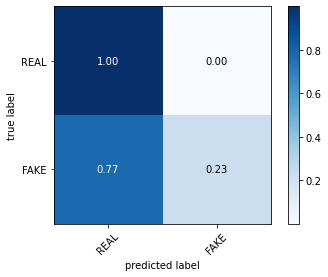

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

multiclass = np.array(confusion_matrix(y_test,predicted))

class_names = ['REAL', 'FAKE']

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(text_clf, x_train, y_train, cv=10)
print("Cross validation on Accuracy for Multinomial classifier:",(str(np.mean(scores)*100) + ' %'))
precision = cross_val_score(text_clf, x_train, y_train,scoring='precision_weighted', cv=10)
recall = cross_val_score(text_clf, x_train, y_train,scoring='recall_weighted', cv=10)
f1_score = cross_val_score(text_clf, x_train, y_train,scoring='f1_weighted', cv=10)

print("Cross validation on Precision for Naive Bayes classifier:",(str(np.mean(precision)*100) + ' %'))
print("Cross validation on Recall for Naive Bayes classifier:",(str(np.mean(recall)*100) + ' %'))
print("Cross validation on F1-score for Naive Bayes classifier:",(str(np.mean(f1_score)*100) + ' %'))

Cross validation on Accuracy for Multinomial classifier: 91.25930657314811 %
Cross validation on Precision for Naive Bayes classifier: 91.96047984473641 %
Cross validation on Recall for Naive Bayes classifier: 91.25930657314811 %
Cross validation on F1-score for Naive Bayes classifier: 88.69343244785803 %


In [40]:
ans = text_clf.predict(["Health experts say the risks are very low that COVID-19 will remain on envelopes or packages and infect anyone who handles them. #Mail #COVID19 https://t.co/UmJm9Yt30k"])
print(ans)

['False']
